<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Telecommunication_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [6]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Telecommunication.csv")

In [7]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10080 non-null  object 
 1   Symbol              10080 non-null  object 
 2   Series              10080 non-null  object 
 3   Prev Close          10080 non-null  float64
 4   Open                10080 non-null  float64
 5   High                10080 non-null  float64
 6   Low                 10080 non-null  float64
 7   Last                10080 non-null  float64
 8   Close               10080 non-null  float64
 9   VWAP                10080 non-null  float64
 10  Volume              10080 non-null  int64  
 11  Turnover            10080 non-null  float64
 12  Trades              4912 non-null   float64
 13  Deliverable Volume  9545 non-null   float64
 14  %Deliverble         9545 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.2

In [8]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  10080.000000  10080.000000  10080.000000  10080.000000  10080.000000   
mean     323.741701    324.416086    330.476434    317.375823    323.677852   
std      198.829816    199.583292    203.625699    194.337779    198.652427   
min        0.000000     21.100000     21.600000     20.650000     20.700000   
25%      168.587500    169.937500    173.637500    165.200000    168.637500   
50%      308.100000    308.500000    313.800000    302.725000    308.000000   
75%      398.000000    398.912500    404.162500    391.462500    397.737500   
max     1541.700000   1640.000000   1645.000000   1512.250000   1564.000000   

              Close          VWAP        Volume      Turnover        Trades  \
count  10080.000000  10080.000000  1.008000e+04  1.008000e+04  4.912000e+03   
mean     323.704975    323.923676  5.069638e+06  1.720870e+14  7.388954e+04   
std      198.672211    198.884045  8.206862e+06  3.

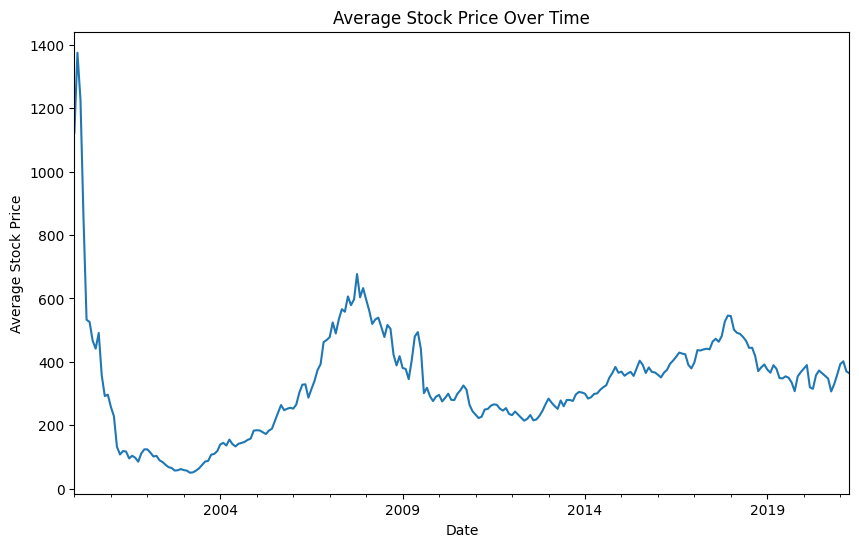

In [9]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

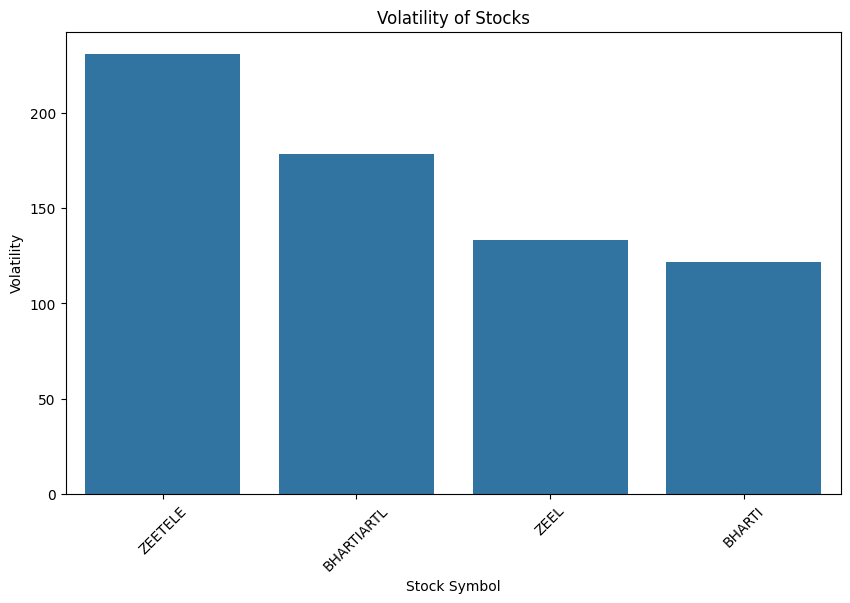

In [10]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

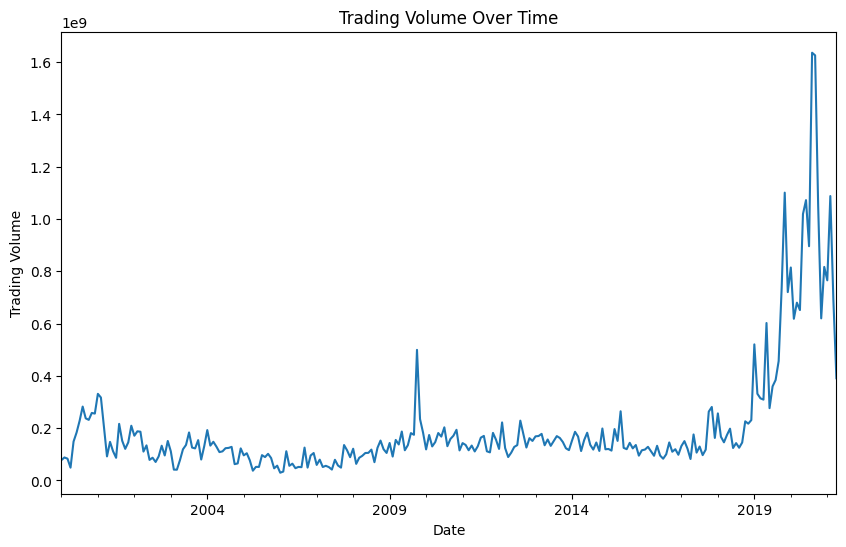

In [11]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


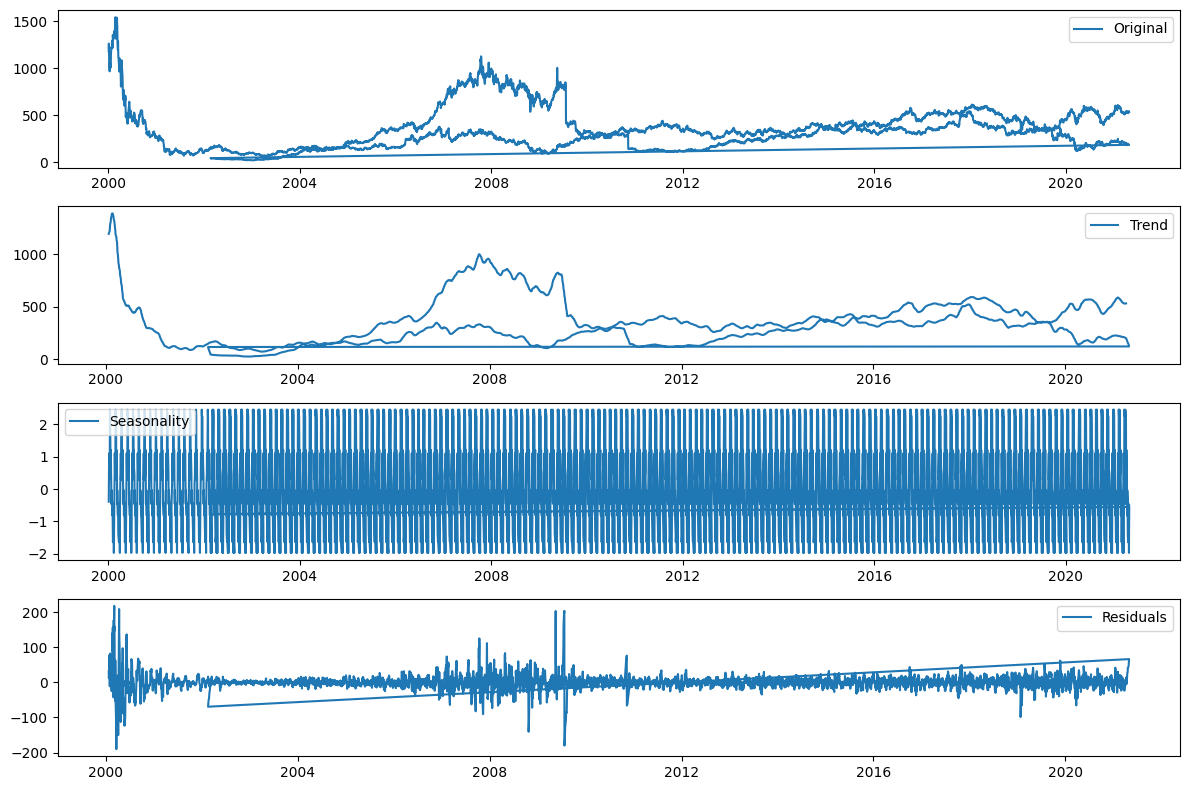

In [12]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

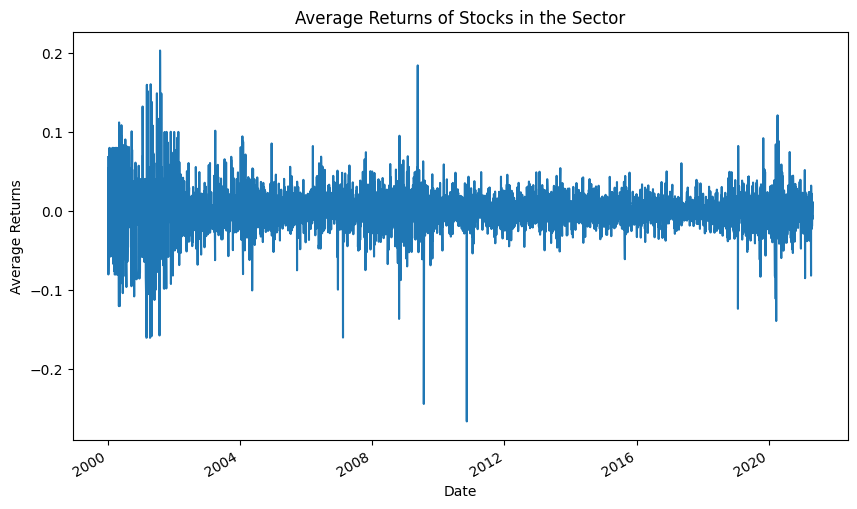

In [13]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()